In [1]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.3)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [42]:
file_name = 'case01_velo_v.dat'

input_data = open('./Data/DataForCorr/Autoencoder/2015/' + file_name)
read_data = np.loadtxt(input_data)
input_data.close()

read_data_tensor = read_data.reshape(1, len(np.atleast_1d(read_data)))

n_input = read_data.size
learning_rate = 0.01
#training_epoch = 40
n_hidden = 40

with tf.variable_scope("autoencoder") :
    X = tf.placeholder(tf.float32, [1, n_input])

    W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
    b_encode = tf.Variable(tf.random_normal([n_hidden]))

    encoder = tf.add(tf.matmul(X, W_encode), b_encode)

    W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
    b_decode = tf.Variable(tf.random_normal([n_input]))

    decoder = tf.add(tf.matmul(encoder, W_decode), b_decode)

    cost = tf.reduce_mean(tf.pow(X - decoder, 2))
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [45]:
start_time = time.time()

test_data = read_data.reshape(1, len(np.atleast_1d(read_data)))
avg_data = np.zeros((1, test_data.size))

avg_count = 100       # wind = 500, velo = 1000
total_cost = 0

for i in range(0, avg_count) :
    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)

        # wind = 100, velo = 60
        for epoch in range(250):
            cost_temp = 0
            _, cost_val = sess.run([optimizer, cost], feed_dict={X: read_data_tensor})
            cost_temp += cost_val
        output_data = sess.run(decoder, feed_dict={X: test_data})
        avg_data += output_data
        total_cost += cost_temp
        
    if (i+1) % 50 == 0 :
        point_time = time.time()
        print(str(i+1) + " Complete, Time :", point_time - start_time)
        
avg_data /= avg_count
total_cost /= avg_count

print(total_cost)
#print(avg_data)

np.savetxt('./Result/Temp/corr_' + str(avg_count) + '_' + file_name,
           np.reshape(avg_data, (output_data.size, 1)), delimiter=" ", fmt="%.4f")

end_time = time.time()
print("Time : ", end_time - start_time)

50 Complete, Time : 51.92078113555908
100 Complete, Time : 103.5110514163971
0.0377337860916
Time :  103.5185706615448


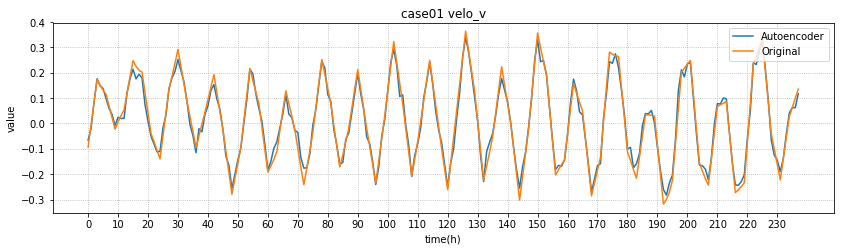

In [46]:
ori_data  = open('./Data/DataForCorr/Autoencoder/2015/' + file_name)
#data  = open('./Result/autoencoder/ep1_' + str(avg_count) + '_' + file_name)
#data  = open('./Result/autoencoder/ep2_500_' + file_name)
data  = open('./Result/Temp/corr_' + str(avg_count) + '_' + file_name)

read_ori_data = np.loadtxt(ori_data)
read_auto_data = np.loadtxt(data)
#read_auto_data1 = np.loadtxt(data1)

ori_data.close()
data.close()
#data1.close()

plt.plot(read_auto_data, label='Autoencoder')
plt.plot(read_ori_data, label='Original')
#plt.plot(read_auto_data1, label='Autoencoder1')
plt.title('case01 velo_v')

plt.xticks(range(0, len(read_data), 10))

#plt.ylim(-12, 7.5)
#plt.xlim(-2, 240)

plt.rc('grid', linestyle=':')
plt.grid(True)
plt.legend(loc = 'upper right')

plt.xlabel('time(h)')
plt.ylabel('value')
fig = plt.gcf()

fig.set_size_inches(14, 3.5)   # case01
#fig.set_size_inches(12, 6)   # case05

plt.show()